In [1]:
# https://chatbotslife.com/cnn-image-classification-using-cifar-10-dataset-on-google-colab-tpu-750da8cd8510
# https://github.com/santanu13/CIFAR_10_Classification_TPU/blob/master/CIFAR_10_CLASSIFICATION_TPU.ipynb

In [2]:
#Import libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)


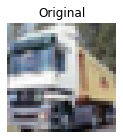

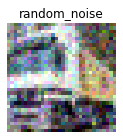

In [3]:
#此處將數據轉換成灰階樣本
from skimage import color
from skimage import exposure
from skimage.transform import rescale
from skimage.util import random_noise
import matplotlib.pyplot as plt
modes = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle' ]

def imagepro(img, display):
    
    if display:
        plt.figure(figsize=(2, 2))
        plt.title('Original')
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    sample = random_noise(img, mode= modes[0])
    if display:
        plt.figure(figsize=(2, 2))
        plt.title('random_noise')
        plt.imshow(sample)
        plt.axis('off')
        plt.show()

    
    return sample
# 驗證
x = imagepro(img = x_train[1], display = True)

In [4]:
# 產生標籤
name2num = {'airplane' : 0,
            'automobile' : 1,
            'bird' : 2,
            'cat' : 3,
            'deer' : 4,
            'dog' : 5,
            'frog' : 6,
            'horse' : 7,
            'ship' : 8,
            'truck' : 9}
num2name = dict([(v,k) for (k,v) in name2num.items()])
num2name

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [5]:
%%time
###########################################
#所有影像處理都在這裡
# source = x_train, x_test
# target = x_train_skimage, x_test_skiage
###########################################
x_train_skimage = np.array( [ imagepro(img = x, display = False) for x in x_train]  )
x_test_skimage = np.array(  [ imagepro(img = x, display = False) for x in x_test]  )

CPU times: user 14.8 s, sys: 880 ms, total: 15.6 s
Wall time: 18 s


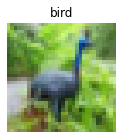

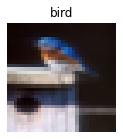

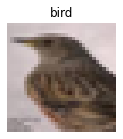

In [6]:
# 請幫忙顯示十張truck 原來數據
# x_train, y_train
# 'truck' : 9
model = 2
x_train_filter = x_train[y_train.flatten()==model]

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.title(num2name.get(model))
    plt.imshow(x_train_filter[i], cmap='gray')
    plt.axis('off')
    plt.show()

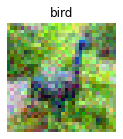

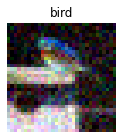

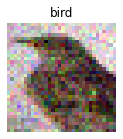

In [7]:
# 請幫忙顯示十張truck 處理後數據
# x_train, y_train
# 'truck' : 9
model = 2
x_train_filter = x_train_skimage[y_train.flatten()==model]

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.title(num2name.get(model))
    plt.imshow(x_train_filter[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [8]:
# 檢視是否需要將數據進行處理 /255.0
# 更換數據
x_train_skimage[0].min(), x_train_skimage[0].max()

(0.0, 1.0)

In [9]:
import numpy as np  
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  

y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
x_Test_norm = x_test_skimage.reshape(x_test_skimage.shape[0], 
                                     x_test_skimage.shape[1]*x_test_skimage.shape[2]*3).astype('float32') # /255.0
del x_test_skimage
x_Train_norm = x_train_skimage.reshape(x_train_skimage.shape[0], 
                                       x_train_skimage.shape[1]*x_train_skimage.shape[2]*3).astype('float32')   #/255.0
del x_train_skimage

In [10]:
# y_TrainOneHot = np_utils.to_categorical(y_train) 
# y_TestOneHot = np_utils.to_categorical(y_test) 

# # 將 training 的 input 資料轉為2維
# x_train = x_train_skimage #<--------------preprocessed by skimage
# x_test  = x_test_skimage  #<--------------preprocessed by skimage

# X_train_2D = x_train.reshape(x_train.shape[0], 64*64*3).astype('float32')  
# X_test_2D = x_test.reshape(x_test.shape[0], 64*64*3).astype('float32')    
# x_Train_norm = X_train_2D /255.0  #<------
# x_Test_norm = X_test_2D   /255.0  #<------

In [11]:
# 建置model 
# 導入函式庫
import numpy as np  
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=x_Train_norm.shape[1], kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=30, 
                          batch_size=800, verbose=2)  

Epoch 1/30
50/50 - 2s - loss: 2.0444 - accuracy: 0.2629 - val_loss: 1.9037 - val_accuracy: 0.3322 - 2s/epoch - 48ms/step
Epoch 2/30
50/50 - 2s - loss: 1.8459 - accuracy: 0.3503 - val_loss: 1.8247 - val_accuracy: 0.3574 - 2s/epoch - 35ms/step
Epoch 3/30
50/50 - 2s - loss: 1.7786 - accuracy: 0.3763 - val_loss: 1.8022 - val_accuracy: 0.3590 - 2s/epoch - 35ms/step
Epoch 4/30
50/50 - 2s - loss: 1.7311 - accuracy: 0.3914 - val_loss: 1.7454 - val_accuracy: 0.3817 - 2s/epoch - 34ms/step
Epoch 5/30
50/50 - 2s - loss: 1.6894 - accuracy: 0.4076 - val_loss: 1.7298 - val_accuracy: 0.3858 - 2s/epoch - 34ms/step
Epoch 6/30
50/50 - 2s - loss: 1.6627 - accuracy: 0.4166 - val_loss: 1.7105 - val_accuracy: 0.3955 - 2s/epoch - 35ms/step
Epoch 7/30
50/50 - 2s - loss: 1.6279 - accuracy: 0.4281 - val_loss: 1.6844 - val_accuracy: 0.4062 - 2s/epoch - 34ms/step
Epoch 8/30
50/50 - 2s - loss: 1.6020 - accuracy: 0.4387 - val_loss: 1.6627 - val_accuracy: 0.4114 - 2s/epoch - 35ms/step
Epoch 9/30
50/50 - 2s - loss: 1.

In [13]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

313/313 [==============================] - 0s 2ms/step - loss: 1.4956 - accuracy: 0.4716

	[Info] Accuracy of testing data = 47.2%


In [14]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))

1563/1563 [==============================] - 2s 2ms/step - loss: 1.3336 - accuracy: 0.5345

	[Info] Accuracy of training data = 53.5%


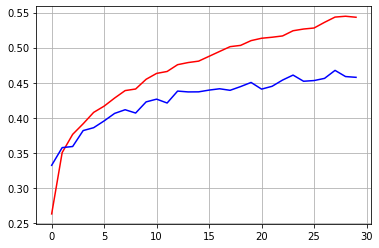

In [15]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

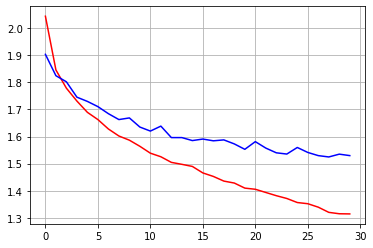

In [16]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()